# The purpose of this code is to recover Chapter 1's plots and examples

In [30]:
#Import libraries

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
import scipy.stats as stats
import statsmodels.api as sm

#Others
import warnings 

sns.set_style('white')
warnings.simplefilter('ignore')
%matplotlib inline

In [9]:
#Read in Data

'''Data was pulled from R package'''

df_in = pd.read_csv('./datasets/segmentationData.csv',index_col = 0)

In [10]:
df_in.head()

,PredictorA,PredictorB,Class,Case
1,742.115646,68.783380,PS,Test
2,3278.725624,154.898761,PS,Train
3,1727.410431,84.564598,WS,Train
4,1194.931973,101.091070,PS,Train
5,1140.426304,86.466698,PS,Test


## 1. Figure 1.2(a)

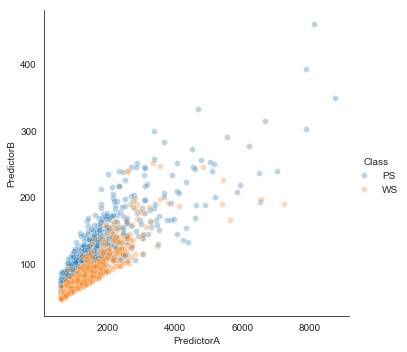

In [27]:
_ = sns.pairplot(x_vars=['PredictorA'],y_vars = ['PredictorB'], data= df_in, hue = 'Class',size = 5,plot_kws = dict(alpha = .3))

## 2. Apply Logistic Regression Model to Estimate Model Parameters

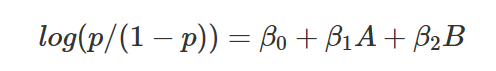

### use MLE to estimate

In [29]:
#Split the data into training and test

df_train = df_in[df_in['Case'] == 'Train']
df_test = df_in[df_in['Case'] == 'Test']

print('The length of the training dataset is: ', len(df_train))

print('The length of the test dataset is: ', len(df_test))

The length of the training dataset is:  1009
The length of the test dataset is:  1010


In [46]:
X = df_train[['PredictorA','PredictorB']]
X = sm.add_constant(X)

#Create a 0/1 column
df_train['Class2'] = np.where(df_train['Class'] == 'PS',0,1)
y = df_train[['Class2']]

logit = sm.Logit(y,X)
results = logit.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.561517
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Class2   No. Observations:                 1009
Model:                          Logit   Df Residuals:                     1006
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1476
Time:                        23:44:02   Log-Likelihood:                -566.57
converged:                       True   LL-Null:                       -664.71
                                        LLR p-value:                 2.389e-43
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7312      0.253      6.853      0.000       1.236       2.226
PredictorA     0.0026      0.000     10.131      0.000       0.002       0.003
PredictorB    -0.0644      0.006    -10.827      0.000      -0.076      -0.053
==============================================================================
"""

In [49]:
results.params

const         1.731243
PredictorA    0.002622
PredictorB   -0.064411
dtype: float64